In [ ]:
import pandas as pd
import numpy as np
import re 
import pickle

from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('ggplot')

In [340]:
df =pd.read_csv(r"C:\\Users\\rabi3\Desktop\\PFE\\corpus.csv",delimiter=';')

In [341]:
df.head()

,text,target
0,RELEVÉ DE COMPTE باـــــــسح فــــشـــــك N° d...,AB02
1,RELEVÉ DE COMPTE باـــــــسح فــــشـــــك N° d...,AB02
2,RELEVÉ DE COMPTE باـــــــسح فــــشـــــك N° d...,AB02
3,RELEVÉ DE COMPTE باـــــــسح فــــشـــــك N° d...,AB02
4,RELEVÉ DE COMPTE باـــــــسح فــــشـــــك N° d...,AB02


In [342]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    180 non-null    object
 1   target  180 non-null    object
dtypes: object(2)
memory usage: 2.9+ KB


# 2. Text Cleaning

In [343]:
# delete empty text
df = df[df['text'] != ' ']
# df.shape

In [344]:
def classes_def(x):
    if x ==  "AB02":
        return "0"
    elif x == "ATB EUR":
        return "1"
    elif x == "ATB€":
        return "1"
    elif x ==  "ATB01":
        return "1"
    elif x ==  "BH 01":
        return "2"
    elif x ==  "BIA01€":
        return "3"
    elif x ==  "BIAT01":
        return "3"
    elif x ==  "BIAT03":
        return "3"
    elif x ==  "STB€":
        return "4"
    elif x ==  "STB01":
        return "4"
    elif x ==  "STB01TEC$":
        return "4"
    elif x ==  "STB01TEC€":
        return "4"
    elif x ==  "STB02":
        return "4"
    elif x ==  "UIB€":
        return "5"
    elif x ==  "UIB01":
        return "5"
    elif x ==  "WB01":
        return "6"
    elif x ==  "ZIT01":
        return "7"
    else:
        return "20"
    

df['Y']=df['target'].apply(lambda x:classes_def(x))

In [345]:
df

,text,target,Y
0,RELEVÉ DE COMPTE باـــــــسح فــــشـــــك N° d...,AB02,0
1,RELEVÉ DE COMPTE باـــــــسح فــــشـــــك N° d...,AB02,0
2,RELEVÉ DE COMPTE باـــــــسح فــــشـــــك N° d...,AB02,0
3,RELEVÉ DE COMPTE باـــــــسح فــــشـــــك N° d...,AB02,0
4,RELEVÉ DE COMPTE باـــــــسح فــــشـــــك N° d...,AB02,0
...,...,...,...
175,Compte:STE MAS SA 47007000000003183019 Devise:...,WB01,6
176,Compte:STE MAS SA 47007000000003183019 Devise:...,WB01,6
177,01/12/2021 31/12/2021 25050000000128319347 TN5...,ZIT01,7
178,01/11/2021 30/11/2021 25050000000128319347 TN5...,ZIT01,7


# 3. TF-IDF

In [346]:
X = df["text"].tolist()
Y = df["target"].tolist()

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.10, random_state = 0)

In [347]:
from sklearn.feature_selection import chi2,SelectKBest

In [348]:
tfidf = TfidfVectorizer()
# tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, )

# We transform each text into a vector
features = tfidf.fit_transform(df.text).toarray()

# Dump the file
pickle.dump(df, open("data_frame_for_TFIDF.pickle", "wb"))


labels = df.Y

print("Each of the %d text is represented by %d features (TF-IDF score of unigrams and bigrams)" %(features.shape))

Each of the 179 text is represented by 172 features (TF-IDF score of unigrams and bigrams)


In [349]:
# vectorizer = TfidfVectorizer(
#     analyzer='word', 
#     sublinear_tf=True,
#     strip_accents='unicode',
#     token_pattern=r'\w{1,}',
#     ngram_range=(1, 1),
#     max_features=10000)

In [350]:
# print('Start Fit vectorizer')
# tfidf = vectorizer.fit(X_train)

In [351]:
# print('Start transform test corpus')
# test_comment_features = vectorizer.transform(X_test)

In [352]:
# print('Start transform train corpus')
# train_comment_features = vectorizer.transform(X_train)

# 4. Models

In [353]:
models = [
    RandomForestClassifier(n_estimators=100, max_depth=5, random_state=0),
    LinearSVC(),
    MultinomialNB(),
]

# 5 Cross-validation
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))

entries = []
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
    
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

C:\Users\rabi3\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\rabi3\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\rabi3\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


In [354]:
mean_accuracy = cv_df.groupby('model_name').accuracy.mean()
std_accuracy = cv_df.groupby('model_name').accuracy.std()

acc = pd.concat([mean_accuracy, std_accuracy], axis= 1, 
          ignore_index=True)
acc.columns = ['Mean Accuracy', 'Standard deviation']
acc

,Mean Accuracy,Standard deviation
model_name,,
LinearSVC,1.000000,0.000000
MultinomialNB,0.972063,0.019645
RandomForestClassifier,0.983333,0.024845


Text(0.5, 1.0, 'MEAN ACCURACY (cv = 5)\n')

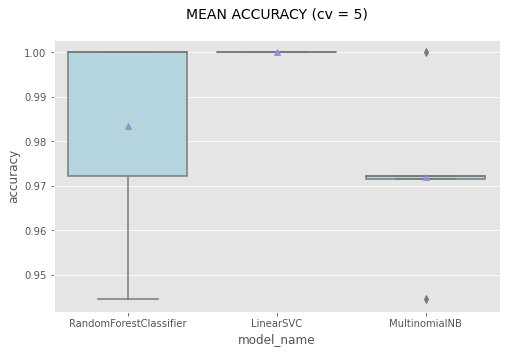

In [355]:
plt.figure(figsize=(8,5))
sns.boxplot(x='model_name', y='accuracy', 
            data=cv_df, 
            color='lightblue', 
            showmeans=True)
plt.title("MEAN ACCURACY (cv = 5)\n", size=14)

In [356]:
import pdfplumber
pdf = pdfplumber.open("MAS_2022/ZIT01/MAS_ZIT01_FEVRIER_2022.pdf")
page = pdf.pages[0]
text = page.extract_text()
        
# delete tabs, newlines, etc,' ':
text = re.sub('\s+',' ',text)

pdf_head_text = text[0:100]

In [357]:
pdf_head_text

'01/02/2022 28/02/2022 25050000000128319347 TN59 25050000000128319347 TND SOCIETE MAS SA 000 ZI MENZE'

In [358]:
X_train, X_test, y_train, y_test,indices_train,indices_test = train_test_split(features, labels, df.index, test_size=0.10, random_state=1)

In [359]:
model =   LinearSVC()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [360]:
model.score(X_test,y_test)
model.sparsify()

LinearSVC()

In [361]:
y_pred

array(['4', '4', '4', '5', '1', '3', '4', '1', '4', '4', '4', '4', '0',
       '3', '0', '4', '1', '4'], dtype=object)

In [362]:
pickle.dump(model, open('model.pkl','wb'))

In [363]:
df2 = {'text' : pdf_head_text  ,'target' :'other' , 'Y' : '20'}
df = df.append(df2 , ignore_index = True  )
df3 = df[df['Y']== '20']

In [364]:
df3

,text,target,Y


In [365]:
# load model and old dataSet to re-transform to TFIDF
model1 = pickle.load(open('model.pkl','rb'))
df_tfidf = pickle.load(open("data_frame_for_TFIDF.pickle", "rb"))

In [366]:
tfidf_new = TfidfVectorizer()
# apply TFIDF on old data
features_new = tfidf_new.fit_transform(df_tfidf.text).toarray()

In [367]:
# apply TFIDF on new data
new_X_test = tfidf_new.transform(df3.text).toarray()

In [368]:
y_pred = model1.predict(new_X_test)
y_pred

array(['7'], dtype=object)